C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


mnist size and target (70000, 784) (70000,)
digits size and target (1797, 64) (1797,)


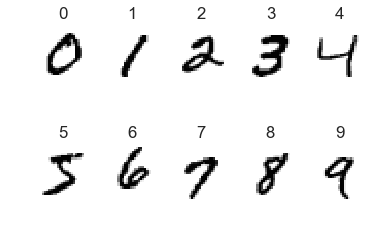

In [7]:
%matplotlib inline
import sklearn
from sklearn.datasets import fetch_mldata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
mnist = fetch_mldata('MNIST original')
digits = sklearn.datasets.load_digits()

print('mnist size and target',mnist.data.shape,mnist.target.shape)
print('digits size and target',digits.data.shape,digits.target.shape)

    
for i in range(10):
    ind=np.where(mnist.target[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist.data[ind].reshape(28,28),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(mnist.target[ind])))
plt.show()

    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.143)

digits_X_train, digits_X_test, digits_y_train, digits_y_test = train_test_split(digits.data, digits.target, test_size=0.143)

In [8]:
# code goes here
import sklearn
from sklearn.preprocessing import binarize
from sklearn import naive_bayes
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import bernoulli
clf=sklearn.naive_bayes.BernoulliNB()

### Lets try with smaller digits dataset

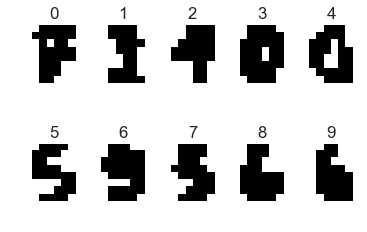

Model Score is: 0.87
[[26  0  0  0  1  0  0  0  0  0]
 [ 0 18  1  0  0  1  0  0  3  0]
 [ 0  2 18  3  0  0  0  0  1  0]
 [ 0  0  2 18  0  0  0  0  1  1]
 [ 0  0  0  0 27  0  1  0  0  0]
 [ 1  1  0  0  0 19  0  0  1  3]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  1  0  0 23  0  0]
 [ 0  2  1  0  0  0  1  0 17  2]
 [ 0  0  0  0  1  0  0  2  0 33]]


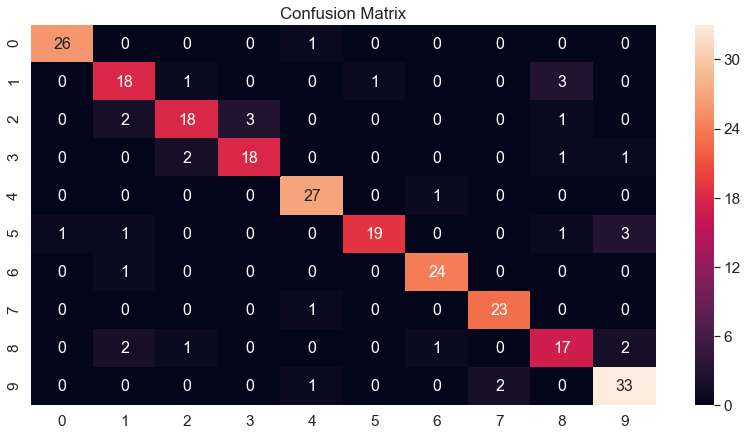

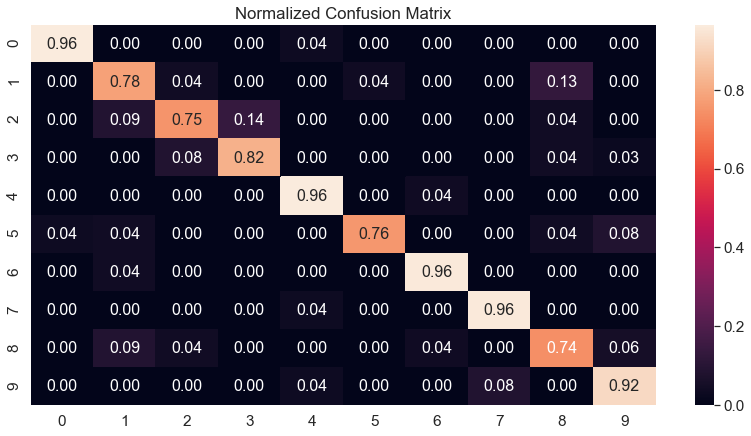

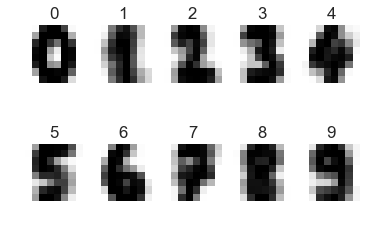

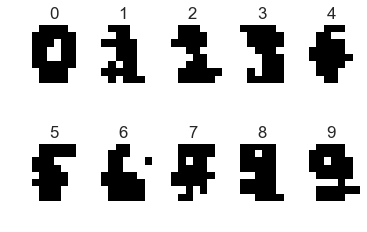

In [9]:
#######################Plotting digits
binarized_X_train=sklearn.preprocessing.binarize(digits_X_train, threshold=0.0, copy=False)
binarized_X_test=sklearn.preprocessing.binarize(digits_X_test, threshold=0.0, copy=False)

################## Making sure binarization worked
for i in range(10):
    ind=np.where(y_train[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(binarized_X_train[ind].reshape(8,8),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(y_train[ind])))
plt.show()
##################

clf.fit(binarized_X_train, digits_y_train)
y_pred=clf.predict(digits_X_test)

proba=clf.predict_proba(binarized_X_test)
print('Model Score is: %.2f' % (clf.score(binarized_X_test, digits_y_test)))

cf=confusion_matrix(digits_y_test, y_pred)
print(cf)

norm=cf / cf.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(cf, range(10),range(10))

plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g').set_title('Confusion Matrix')# font size
plt.show()
plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(norm, annot=True,annot_kws={"size": 16},fmt='.2f').set_title('Normalized Confusion Matrix')# font size
plt.show()

for i in range(10):
    ind=np.where(y_train[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(np.exp(clf.feature_log_prob_[i].reshape(8,8)),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(y_train[ind])))
plt.show()

for i in range(10):
    ind=np.where(y_train[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    digit=np.zeros(64)
    for j in range(64):
        digit[j]=np.random.binomial(1, p=np.exp(clf.feature_log_prob_[i][j]))
        plt.imshow(np.array(digit).reshape(8,8),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(y_train[ind])))
plt.show()

### Now to the original MNIST dataset

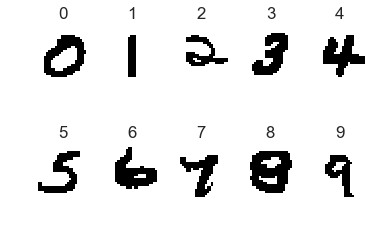

Model Score is: 0.83
[[ 903    1    2    7    3   53   11    0   26    1]
 [   0 1076   10    6    1   12    4    1   20    3]
 [  18   23  795   20   23    3   41   10   47    3]
 [   9   25   47  845    2   21    8   11   60   28]
 [   3    5    7    0  784    0   15    3   25  138]
 [  29   11    7  139   32  632   16    2   21   29]
 [  11   34   17    2    8   25  857    0    7    0]
 [   6   21   13    4   26    0    0  874   15   57]
 [  15   37   17   70   11   29    8    3  769   37]
 [  15   17    9    9   77    4    0   32   32  765]]


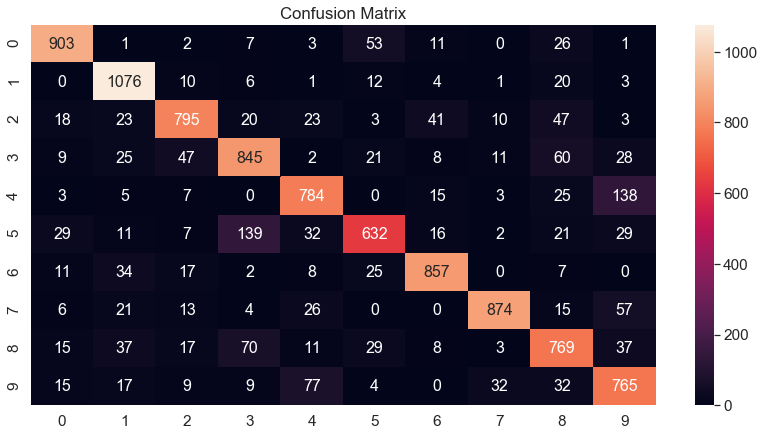

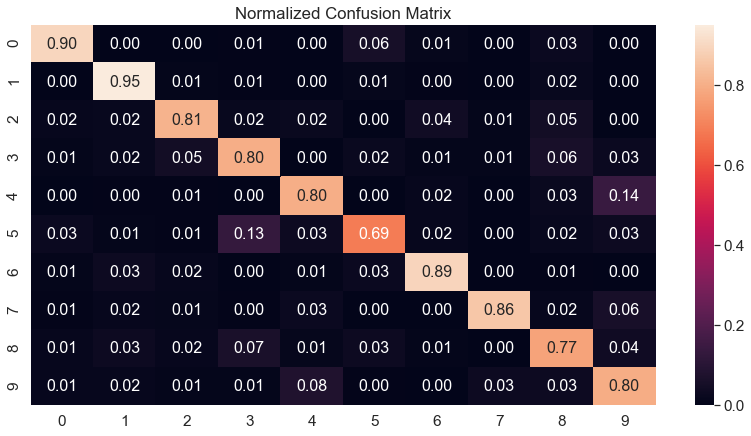

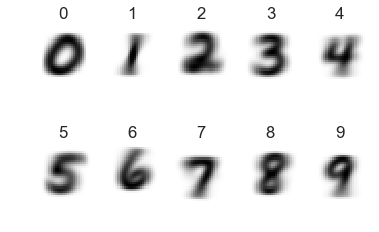

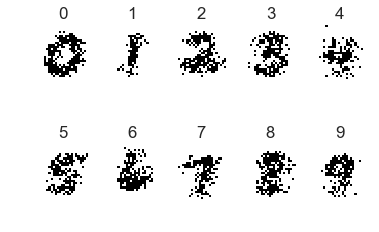

In [10]:
#######################Plotting MNIST

binarized_X_train=sklearn.preprocessing.binarize(X_train, threshold=0.0, copy=False)
binarized_X_test=sklearn.preprocessing.binarize(X_test, threshold=0.0, copy=False)

################## Making sure binarization worked
for i in range(10):
    ind=np.where(y_train[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(binarized_X_train[ind].reshape(28,28),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(y_train[ind])))
plt.show()
##################

clf.fit(binarized_X_train, y_train)
y_pred=clf.predict(X_test)

proba=clf.predict_proba(binarized_X_test)
print('Model Score is: %.2f' %(clf.score(binarized_X_test, y_test)))

cf=confusion_matrix(y_test, y_pred)
print(cf)

norm=cf / cf.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(cf, range(10),range(10))

plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g').set_title('Confusion Matrix')# font size
plt.show()
plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(norm, annot=True,annot_kws={"size": 16},fmt='.2f').set_title('Normalized Confusion Matrix')# font size
plt.show()

for i in range(10):
    ind=np.where(y_train[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(np.exp(clf.feature_log_prob_[i].reshape(28,28)),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(y_train[ind])))
plt.show()

for i in range(10):
    ind=np.where(y_train[:]==i)
    ind=ind[0][0]
    plt.subplot(2, 5, i+1)
    digit=np.zeros(784)
    for j in range(784):
        digit[j]=np.random.binomial(1, p=np.exp(clf.feature_log_prob_[i][j]))
    plt.imshow(digit.reshape(28,28),cmap='gray_r')
    plt.axis('off')
    plt.title(str(int(y_train[ind])))
plt.show()

C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Score is: 0.90
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 19  1  1  0  1  0  0  1  0]
 [ 0  1 21  0  0  0  0  0  2  0]
 [ 0  0  1 18  0  1  0  0  1  1]
 [ 0  1  0  0 27  0  0  0  0  0]
 [ 0  1  0  0  0 22  0  0  0  2]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1]
 [ 0  2  2  0  0  0  1  0 18  0]
 [ 0  2  0  0  0  0  0  0  1 33]]


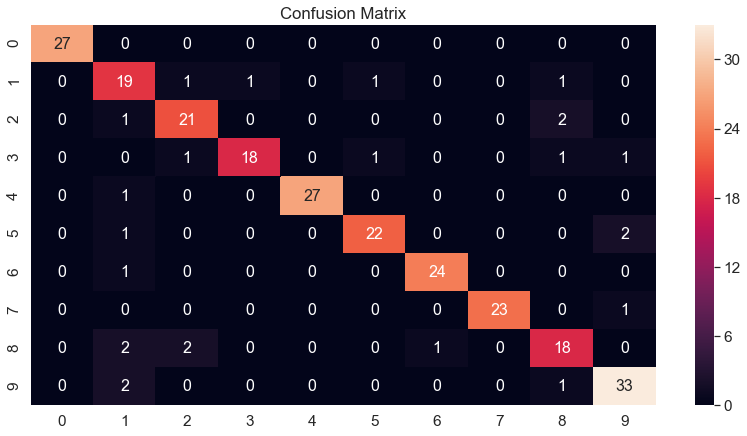

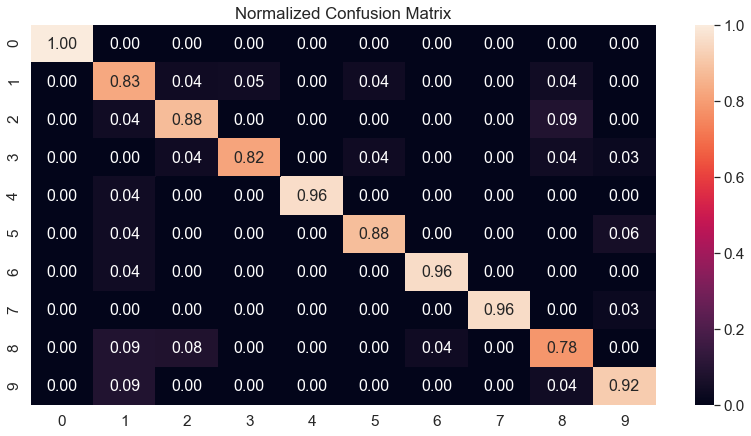

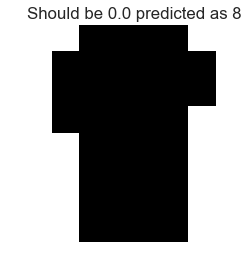

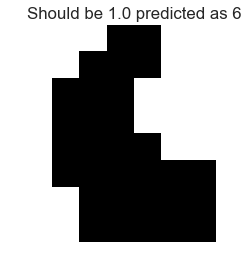

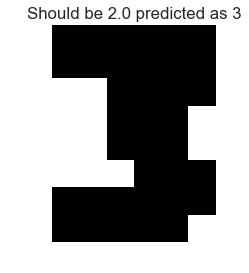

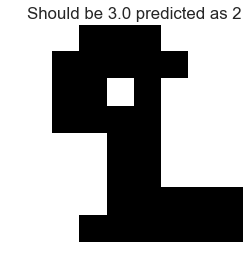

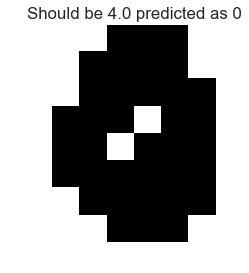

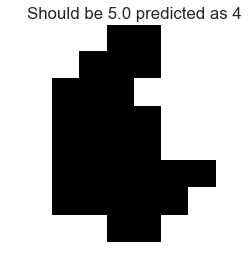

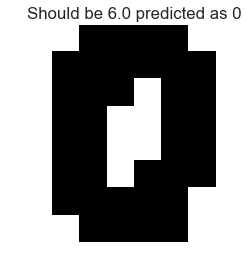

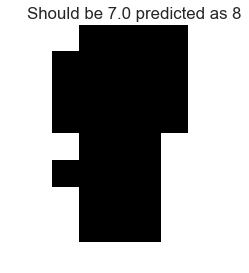

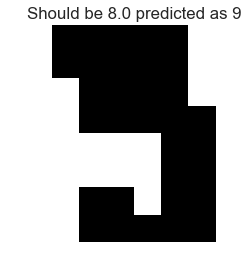

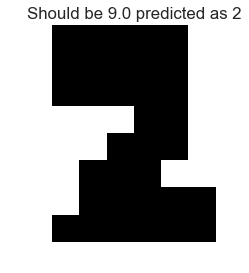

In [11]:
#Digits that were not classified correctly
from sklearn.linear_model import LogisticRegression
#######################Plotting digits
binarized_X_train=sklearn.preprocessing.binarize(digits_X_train, threshold=0.0, copy=False)
binarized_X_test=sklearn.preprocessing.binarize(digits_X_test, threshold=0.0, copy=False)

clf = LogisticRegression(solver='lbfgs').fit(binarized_X_train, digits_y_train)
y_pred=clf.predict(digits_X_test)

proba=clf.predict_proba(binarized_X_test)
print('Model Score is: %.2f' % (clf.score(binarized_X_test, digits_y_test)))

cf=confusion_matrix(digits_y_test, y_pred)
print(cf)

norm=cf / cf.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(cf, range(10),range(10))

plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g').set_title('Confusion Matrix')# font size
plt.show()
plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(norm, annot=True,annot_kws={"size": 16},fmt='.2f').set_title('Normalized Confusion Matrix')# font size
plt.show()

digit=0

for i in range(len(digits_y_test)):
    if(y_test[i]!=y_pred[i] and y_test[i]==digit):
        plt.imshow(binarized_X_test[i].reshape(8,8),cmap='gray_r')
        plt.axis('off')
        plt.title('Should be '+ str(y_test[i]) + ' predicted as ' + str(y_pred[i]))
        digit+=1
        if digit == 10:
            break
        plt.show()

C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\romanrosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increa

Model Score is: 0.91
[[ 976    0    2    2    5   10    3    0    6    3]
 [   0 1094    6    0    1    5    4    2   19    2]
 [   1    8  855   25   11   10   14   13   38    8]
 [   7    8   29  924    1   28    4    9   34   12]
 [   2    3    6    2  897    2   12    6    9   41]
 [  13    9    6   41   18  779   13    3   28    8]
 [  10    7    8    0    7   14  907    1    7    0]
 [   6    5   11    2   13    2    1  944    5   27]
 [  11   19   16   22    6   16   10    4  877   15]
 [   7    6    4   15   26    6    0   33   15  848]]


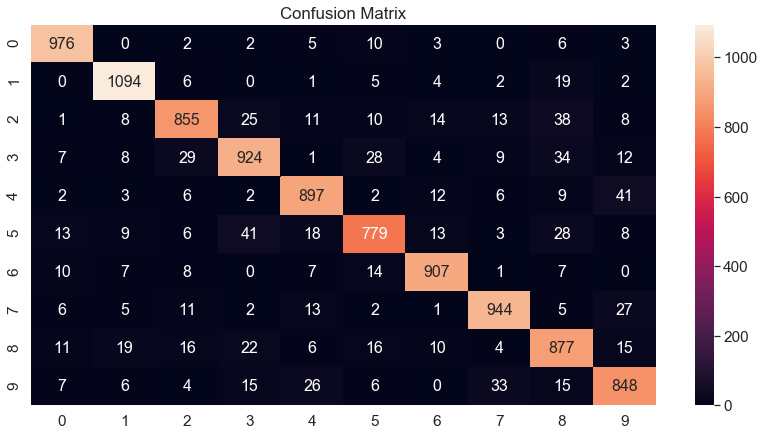

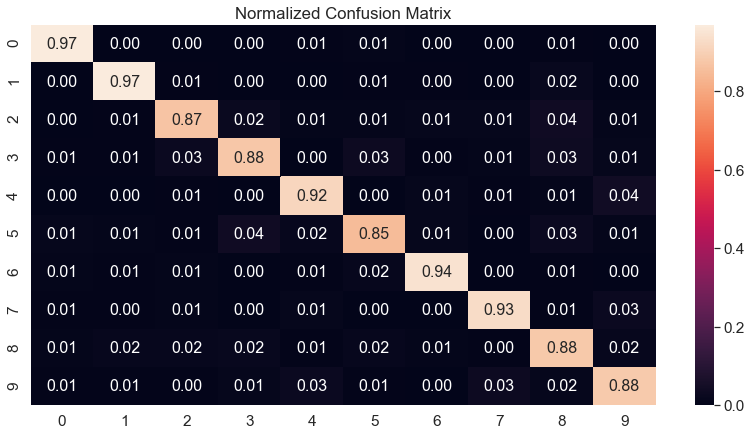

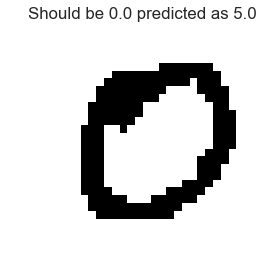

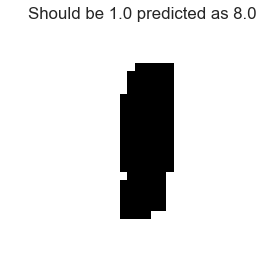

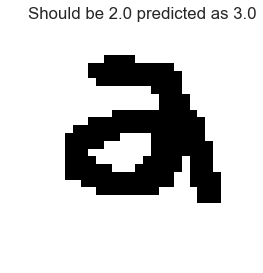

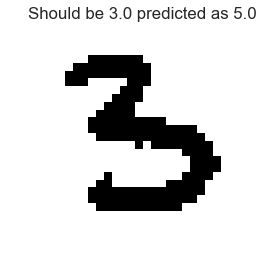

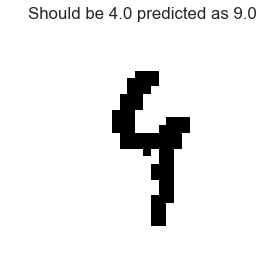

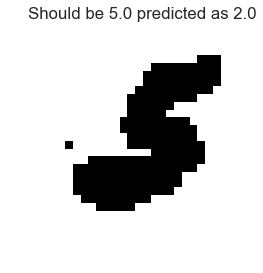

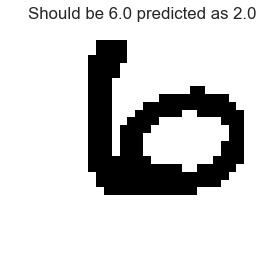

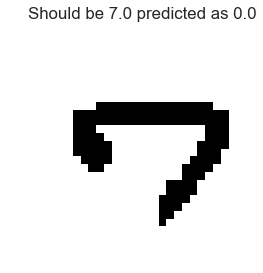

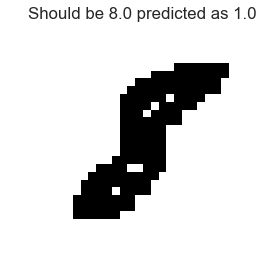

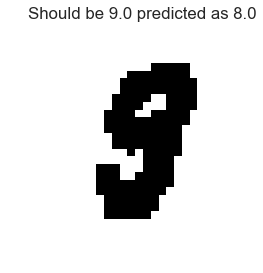

In [12]:
#Digits that were not classified correctly
from sklearn.linear_model import LogisticRegression
#######################Plotting MNIST
binarized_X_train=sklearn.preprocessing.binarize(X_train, threshold=0.0, copy=False)
binarized_X_test=sklearn.preprocessing.binarize(X_test, threshold=0.0, copy=False)

clf = LogisticRegression(solver='lbfgs').fit(binarized_X_train, y_train)
y_pred=clf.predict(X_test)

proba=clf.predict_proba(binarized_X_test)
print('Model Score is: %.2f' % (clf.score(binarized_X_test, y_test)))

cf=confusion_matrix(y_test, y_pred)
print(cf)

norm=cf / cf.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(cf, range(10),range(10))

plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g').set_title('Confusion Matrix')# font size
plt.show()
plt.figure(figsize = (14,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(norm, annot=True,annot_kws={"size": 16},fmt='.2f').set_title('Normalized Confusion Matrix')# font size
plt.show()

digit=0

for i in range(len(y_test)):
    if(y_test[i]!=y_pred[i] and y_test[i]==digit):
        plt.imshow(binarized_X_test[i].reshape(28,28),cmap='gray_r')
        plt.axis('off')
        plt.title('Should be '+ str(y_test[i]) + ' predicted as ' + str(y_pred[i]))
        digit+=1
        if digit == 10:
            break
        plt.show()